In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
import pandas
display(HTML("<style>.container { width:100% !important; }</style>"))
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.max_colwidth', 500)
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.width', 1000)
pandas.options.display.float_format = '{:30,.3f}'.format

In [2]:
import glob
import pandas
import numpy as np
from tabula import read_pdf_table

import geopandas
import pandas
import os
import glob

import dateutil
import datetime

from simpledbf import Dbf5
import pandas_access as mdb

In [3]:
def read_calls_for_service_pdf(file_path):
    top = 113.9
    left = 88.93
    height = 601.22
    width = 601.22

    y1 = top
    x1 = left
    y2 = top + height
    x2 = left + width
    table_area = y1,x1,y2,x2

    street_raw = read_pdf_table(file_path,
                                options="--pages=all",
                                area=table_area,
                                spreadsheet=True)
    street_raw.columns = ['complaint',
                      'dateStart',
                      'CallCode',
                      'SituationFound',
                      'AddressNo',
                      'StreetDirection',
                      'Street',
                      'District',
                      'CFS_Last_updated']
    street_raw = street_raw[~street_raw.isnull().apply(lambda x: all(x),axis=1)]
    street_raw.reset_index(inplace=True,drop=True)
    
    street_main = street_raw.iloc[::3,:]
    street_main.reset_index(inplace=True,drop=True)

    street_day = street_raw.iloc[1::3,:]['dateStart']
    street_day.reset_index(inplace=True,drop=True)

    street_time = street_raw.iloc[2::3,:]['dateStart']
    street_time.reset_index(inplace=True,drop=True)

    street_final = pandas.DataFrame()
    for i in street_main.columns.tolist():
        street_final.loc[:,i] = street_main[i]

    street_final.loc[:,'dateStart'] = pandas.to_datetime(street_main['dateStart'] + street_day + ' ' + street_time)
    street_final.loc[:,'District'] = street_final.District.astype(int)

    return(street_final)

In [4]:
cfs = pandas.DataFrame()
for i in glob.glob('/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/*.pdf'):
    print(i)
    cfs = cfs.append(read_calls_for_service_pdf(i))
cfs.sort_values('dateStart',ascending=False,inplace=True)
cfs.loc[:,'AddressNo'] = cfs.AddressNo.fillna('None').apply(lambda x: '' if x=='None' else str(x).split('-')[0].split(['.'][0])[0])
cfs.loc[:,'StreetDirection'] = cfs.StreetDirection.fillna('')
cfs.loc[:,'geocode_address'] = cfs.apply(lambda x: (x['AddressNo'] + ' ' + x['StreetDirection'] + ' ' + x['Street']).title() ,axis=1).replace('  ',' ') + ', St Louis, MO'
cfs.reset_index(inplace=True,drop=True)


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/WINNEBAGO.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/GASCONADE.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/MIAMI.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/CAHOKIA.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/MISSOURI.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/S BROADWAY.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/LEMP.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/MARINE.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/KEOKUK.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/MONTANA.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/INDIANA.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/ILLINOIS.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/CHEROKEE.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/KOSCIUSKO.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/S JEFFERSON.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


/home/clay/dev/stl-open-data/data/calls-for-service-pdf-source/ALBERTA.pdf


/home/clay/anaconda2/envs/geo3/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated function read_pdf.


In [ ]:
cfs.to_csv('/home/clay/dev/stl-open-data/data/calls-for-service-output/calls_for_service-2017-05-19.csv',index=False)

In [5]:
import geopandas
cfs = geopandas.GeoDataFrame(cfs)
cfs.loc[:,'parcel_address'] = cfs.apply(lambda x: (x['AddressNo'] + ' ' + x['StreetDirection'] + ' ' + x['Street']).replace('   ',' ').replace('  ',' ').upper() ,axis=1)
cfs

,complaint,dateStart,CallCode,SituationFound,AddressNo,StreetDirection,Street,District,CFS_Last_updated,geocode_address,parcel_address
0,NaN,2017-05-07 23:57:05,DISTD,NaN,3627,,MISSOURI,3,05/08/2017,"3627 Missouri, St Louis, MO",3627 MISSOURI
1,NaN,2017-05-07 23:32:22,SUSPO,NaN,4140,S,BROADWAY,3,05/08/2017,"4140 S Broadway, St Louis, MO",4140 S BROADWAY
2,NaN,2017-05-07 19:40:36,SUSPO,NaN,4052,S,BROADWAY,3,05/08/2017,"4052 S Broadway, St Louis, MO",4052 S BROADWAY
3,NaN,2017-05-07 19:27:03,INVEST,NaN,3933,S,BROADWAY,3,05/08/2017,"3933 S Broadway, St Louis, MO",3933 S BROADWAY
4,NaN,2017-05-07 18:15:40,NOISE,NaN,4041,S,BROADWAY,3,05/08/2017,"4041 S Broadway, St Louis, MO",4041 S BROADWAY
5,NaN,2017-05-07 17:03:09,DIST,NaN,3409,,MISSOURI,3,05/08/2017,"3409 Missouri, St Louis, MO",3409 MISSOURI
6,NaN,2017-05-07 16:22:36,ALARMB,NaN,3710,S,JEFFERSON,3,05/08/2017,"3710 S Jefferson, St Louis, MO",3710 S JEFFERSON
7,NaN,2017-05-07 13:02:15,27,NaN,3900,,MISSOURI,3,05/08/2017,"3900 Missouri, St Louis, MO",3900 MISSOURI
8,NaN,2017-05-07 11:30:39,DIST,NaN,3509,,ILLINOIS,3,05/08/2017,"3509 Illinois, St Louis, MO",3509 ILLINOIS
9,NaN,2017-05-07 08:45:11,SUSPP,NaN,3751,S,JEFFERSON,3,05/08/2017,"3751 S Jefferson, St Louis, MO",3751 S JEFFERSON


In [20]:
import parcels_import
parcels = parcels_import.parcels
parcels.head()

,HANDLE,geometry,CityBlock,OwnerCode,AddrType,LowAddrNum,LowAddrSuf,HighAddrNum,HighAddrSuf,NLC,Parity,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,VacantLot,Condominium,NbrOfUnits,NbrOfApts,Frontage,LandArea,VacBldgYear,GeoCityBlockPart,Ward10,Precinct10,InspArea10,CDADist,CDASubDist,PoliceDist,CensTract10,CensBlock10,HouseConsDist,OwnerOcc,OwnerUpdate,NHD_NAME,NHD_NUM,SITEADDR,parcel_address,geometry_centroid,lon,lat,url
0,10001000005,"POLYGON ((-90.18686630122286 38.61888214059713, -90.18694173710146 38.61869266468818, -90.18726965454628 38.61880622709997, -90.1872029374416 38.61896244766719, -90.18686630122286 38.61888214059713))",1.000,0,3,626,NaN,626,NaN,785.000,E,S,1ST,ST,NaN,NaN,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,1,0,0,0,0.00000000e+00,6098,0,1.008,7,6,3,9,2,4,"1,274.000",1054,55,NaN,05/10/83 00:00:00,Downtown,35,626 S 1ST ST,626 S 1ST,POINT (-90.187065115869 38.61883418435806),-90.187,38.619,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=10001000005
1,10001000005,"POLYGON ((-90.18686630122286 38.61888214059713, -90.18694173710146 38.61869266468818, -90.18726965454628 38.61880622709997, -90.1872029374416 38.61896244766719, -90.18686630122286 38.61888214059713))",1.000,8,3,626,NaN,626,NaN,785.000,E,S,1ST,ST,NaN,NaN,CITY OF ST LOUIS,C/O DDI MEDIA,8315 DRURY IND PARKWAY,ST LOUIS,MO,NaN,63114,0,0,0,0,9.99999978e-03,0,0,1.008,7,6,3,9,2,4,"1,274.000",1054,55,NaN,07/20/06 00:00:00,Downtown,35,626 S 1ST ST,626 S 1ST,POINT (-90.187065115869 38.61883418435806),-90.187,38.619,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=10001000005
2,10001000010,"(POLYGON ((-90.18666453515537 38.61938892088908, -90.18686630122286 38.61888214059713, -90.1872029374416 38.61896244766719, -90.18715713598115 38.61906969306114, -90.18710127058863 38.61910143673894, -90.18704673390467 38.61913457205663, -90.1869935822311 38.61916906480754, -90.18694187044014 38.61920487938362, -90.18689165191788 38.61924197881218, -90.18684297850903 38.61928032479412, -90.18679590046352 38.61931987774338, -90.18675046638452 38.61936059682785, -90.18670672317833 38.619402440...",1.000,0,3,616,NaN,622,NaN,785.000,E,S,1ST,ST,NaN,NaN,STATE OF MISSOURI,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0.00000000e+00,15594,1993,1.008,7,6,3,9,2,4,"1,274.000",1045,55,NaN,05/10/83 00:00:00,Downtown,35,616-22 S 1ST ST,616-22 S 1ST,POINT (-90.1869246430558 38.61912454972954),-90.187,38.619,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=10001000010
3,10001000020,"POLYGON ((-90.18705442872822 38.61931018371927, -90.18700757223614 38.61934507788595, -90.18696219794572 38.6193811575634, -90.1869183545658 38.61941838402213, -90.18687608916224 38.61945671730162, -90.18670672317833 38.6194024400115, -90.18675046638452 38.61936059682785, -90.18679590046352 38.61931987774338, -90.18684297850903 38.61928032479412, -90.18689165191788 38.61924197881218, -90.18694187044014 38.61920487938362, -90.1869935822311 38.61916906480754, -90.18704673390467 38.619134572056...",1.000,0,3,608,NaN,608,NaN,785.000,E,S,1ST,ST,NaN,NaN,TERMINAL RAILROAD ASSN,NaN,ROOM 211 UNION STATION,ST LOUIS,MO,NaN,63103,0,0,0,0,0.00000000e+00,5837,0,1.008,7,6,3,9,2,4,"1,256.000",2102,55,NaN,05/10/83 00:00:00,Downtown,35,608 S 1ST ST,608 S 1ST,POINT (-90.18694080982817 38.61929270716723),-90.187,38.619,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=10001000020
4,10001000032,"POLYGON ((-90.18639803332431 38.61876848032406, -90.18648482360463 38.61853442700357, -90.18652833861634 38.61854949717213, -90.18651583396039 38.61879583773302, -90.18639803332431 38.61876848032406))",1.000,0,A,619,NaN,619,NaN,"1,689.000",O,S,LEONOR K SULLIVAN,BLVD,NaN,NaN,"SLAY, JOHN R",NaN,2812 CHAMPIONSHIP BLVD,ST LOUIS,MO,NaN,63129,1,0,0,0,0.00000000e+00,1983,0,1.008,7,6,3,9,2,4,"1,274.000",1054,55,NaN,12/16/91 00:00:00,Downtown,35,619 S LEONOR K SULLIVAN BLVD,619 S LEONOR K SULLIVAN,POINT (-90.186

In [21]:

cfs_parcels = pandas.merge(parcels,cfs,on='parcel_address',how='right')
#cfs_parcels = cfs_parcels[cfs_parcels['NHD_NAME']=='Marine Villa']
cfs_parcels.reset_index(inplace=True,drop=True)
cfs_parcels.head()

,HANDLE,geometry,CityBlock,OwnerCode,AddrType,LowAddrNum,LowAddrSuf,HighAddrNum,HighAddrSuf,NLC,Parity,StPreDir,StName,StType,StSufDir,StdUnitNum,OwnerName,OwnerName2,OwnerAddr,OwnerCity,OwnerState,OwnerCountry,OwnerZIP,VacantLot,Condominium,NbrOfUnits,NbrOfApts,Frontage,LandArea,VacBldgYear,GeoCityBlockPart,Ward10,Precinct10,InspArea10,CDADist,CDASubDist,PoliceDist,CensTract10,CensBlock10,HouseConsDist,OwnerOcc,OwnerUpdate,NHD_NAME,NHD_NUM,SITEADDR,parcel_address,geometry_centroid,lon,lat,url,complaint,dateStart,CallCode,SituationFound,AddressNo,StreetDirection,Street,District,CFS_Last_updated,geocode_address
0,11523000186,"POLYGON ((-90.22326352132217 38.59344320907404, -90.22319211682529 38.59343425022163, -90.2232611576863 38.59309531000724, -90.22333256185647 38.59310426881679, -90.22326352132217 38.59344320907404))","1,523.000",1,3,"2,201.000",NaN,"2,201.000",NaN,115.000,O,NaN,CHEROKEE,ST,NaN,NaN,HOFFMAN INVESTMENT PROPERTIES LLC,NaN,2339 S 12TH ST,ST LOUIS,MO,NaN,631044243,0,0,0,0,0.00000000e+00,"2,584.000",0,"1,523.008",9,5,1,7,17,3,"1,243.000",2008,16,NaN,05/10/17 00:00:00,Benton Park,22.000,2201 CHEROKEE ST,2201 CHEROKEE,POINT (-90.22326233939624 38.59326925965931),-90.223,38.593,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=11523000186,NaN,2017-04-24 11:25:24,27,NaN,2201,,CHEROKEE,3,05/08/2017,"2201 Cherokee, St Louis, MO"
1,11523000186,"POLYGON ((-90.22326352132217 38.59344320907404, -90.22319211682529 38.59343425022163, -90.2232611576863 38.59309531000724, -90.22333256185647 38.59310426881679, -90.22326352132217 38.59344320907404))","1,523.000",2,3,"2,201.000",NaN,"2,201.000",NaN,115.000,O,NaN,CHEROKEE,ST,NaN,NaN,HOFFMAN INVESTMENT PROPERTIES LLC,NaN,2339 S 12TH ST,ST LOUIS,MO,NaN,631044243,0,0,2,0,0.00000000e+00,"2,584.000",0,"1,523.008",9,5,1,7,17,3,"1,243.000",2008,16,NaN,05/10/17 00:00:00,Benton Park,22.000,2201 CHEROKEE ST,2201 CHEROKEE,POINT (-90.22326233939624 38.59326925965931),-90.223,38.593,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=11523000186,NaN,2017-04-24 11:25:24,27,NaN,2201,,CHEROKEE,3,05/08/2017,"2201 Cherokee, St Louis, MO"
2,11523000186,"POLYGON ((-90.22326352132217 38.59344320907404, -90.22319211682529 38.59343425022163, -90.2232611576863 38.59309531000724, -90.22333256185647 38.59310426881679, -90.22326352132217 38.59344320907404))","1,523.000",3,3,"2,201.000",NaN,"2,201.000",NaN,115.000,O,NaN,CHEROKEE,ST,NaN,NaN,HOFFMAN INVESTMENT PROPERTIES LLC,NaN,2339 S 12TH ST,ST LOUIS,MO,NaN,631044243,0,0,0,0,0.00000000e+00,"2,584.000",0,"1,523.008",9,5,1,7,17,3,"1,243.000",2008,16,NaN,05/10/17 00:00:00,Benton Park,22.000,2201 CHEROKEE ST,2201 CHEROKEE,POINT (-90.22326233939624 38.59326925965931),-90.223,38.593,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=11523000186,NaN,2017-04-24 11:25:24,27,NaN,2201,,CHEROKEE,3,05/08/2017,"2201 Cherokee, St Louis, MO"
3,11523000186,"POLYGON ((-90.22326352132217 38.59344320907404, -90.22319211682529 38.59343425022163, -90.2232611576863 38.59309531000724, -90.22333256185647 38.59310426881679, -90.22326352132217 38.59344320907404))","1,523.000",1,3,"2,201.000",NaN,"2,201.000",NaN,115.000,O,NaN,CHEROKEE,ST,NaN,NaN,HOFFMAN INVESTMENT PROPERTIES LLC,NaN,2339 S 12TH ST,ST LOUIS,MO,NaN,63104,0,0,0,0,0.00000000e+00,"2,584.000",0,"1,523.008",9,5,1,7,17,3,"1,243.000",2008,16,NaN,05/10/17 00:00:00,Benton Park,22.000,2201 CHEROKEE ST,2201 CHEROKEE,POINT (-90.22326233939624 38.59326925965931),-90.223,38.593,http://dynamic.stlouis-mo.gov/citydata/newdesign/data.cfm?Handle=11523000186,NaN,2017-04-24 11:25:24,27,NaN,2201,,CHEROKEE,3,05/08/2017,"2201 Cherokee, St Louis, MO"
4,11523000186,"POLYGON ((-90.22326352132217 38.59344320907404, -90.22319211682529 38.59343425022163, -90.2232611576863 38.59309531000724, -90.22333256185647 38.59310426881679, -90.22326352132217 38.59344320907404))","1,523.000",2,3,"2,201.000",NaN,"2,201.000",NaN,115.000,O,NaN,CHEROKEE,ST,NaN,NaN,HOFFMAN INVESTMENT PROPERTIES LLC,NaN,2339 S 12TH ST,ST LOUI

In [22]:
len(cfs),len(cfs_parcels)

(1808, 1843)

In [25]:
cfs_parcels.to_csv('data/calls-for-service-output/calls_for_service-2017-05-21.csv')

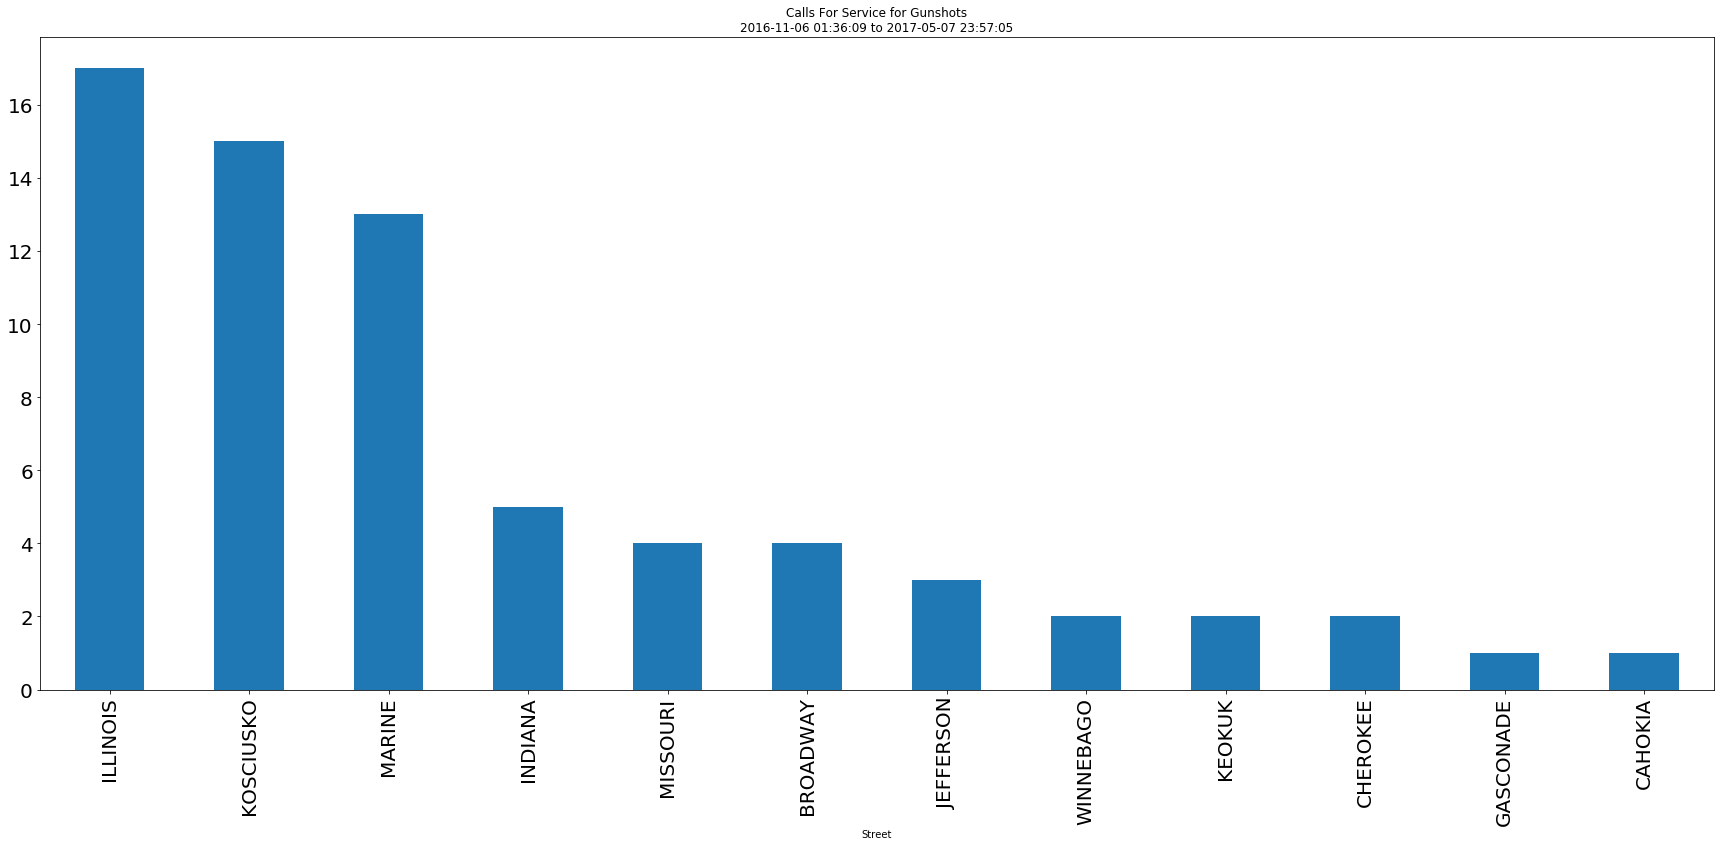

In [28]:
cfs[cfs.CallCode.isin(['SHOTS'])].groupby(['Street']).dateStart.count().sort_values(ascending=False).plot(kind='bar',figsize=(30,12),fontsize=20,title='Calls For Service for Gunshots\n' + str(cfs.dateStart.min()) + ' to ' + str(cfs.dateStart.max()))

In [ ]:
cfs[cfs.CallCode.isin(['SHOTS'])].groupby(['Street']).dateStart.count().sort_values(ascending=False).plot(kind='bar',figsize=(30,12),fontsize=20,title='Calls For Service for Gunshots\n' + str(cfs.dateStart.min()) + ' to ' + str(cfs.dateStart.max()))

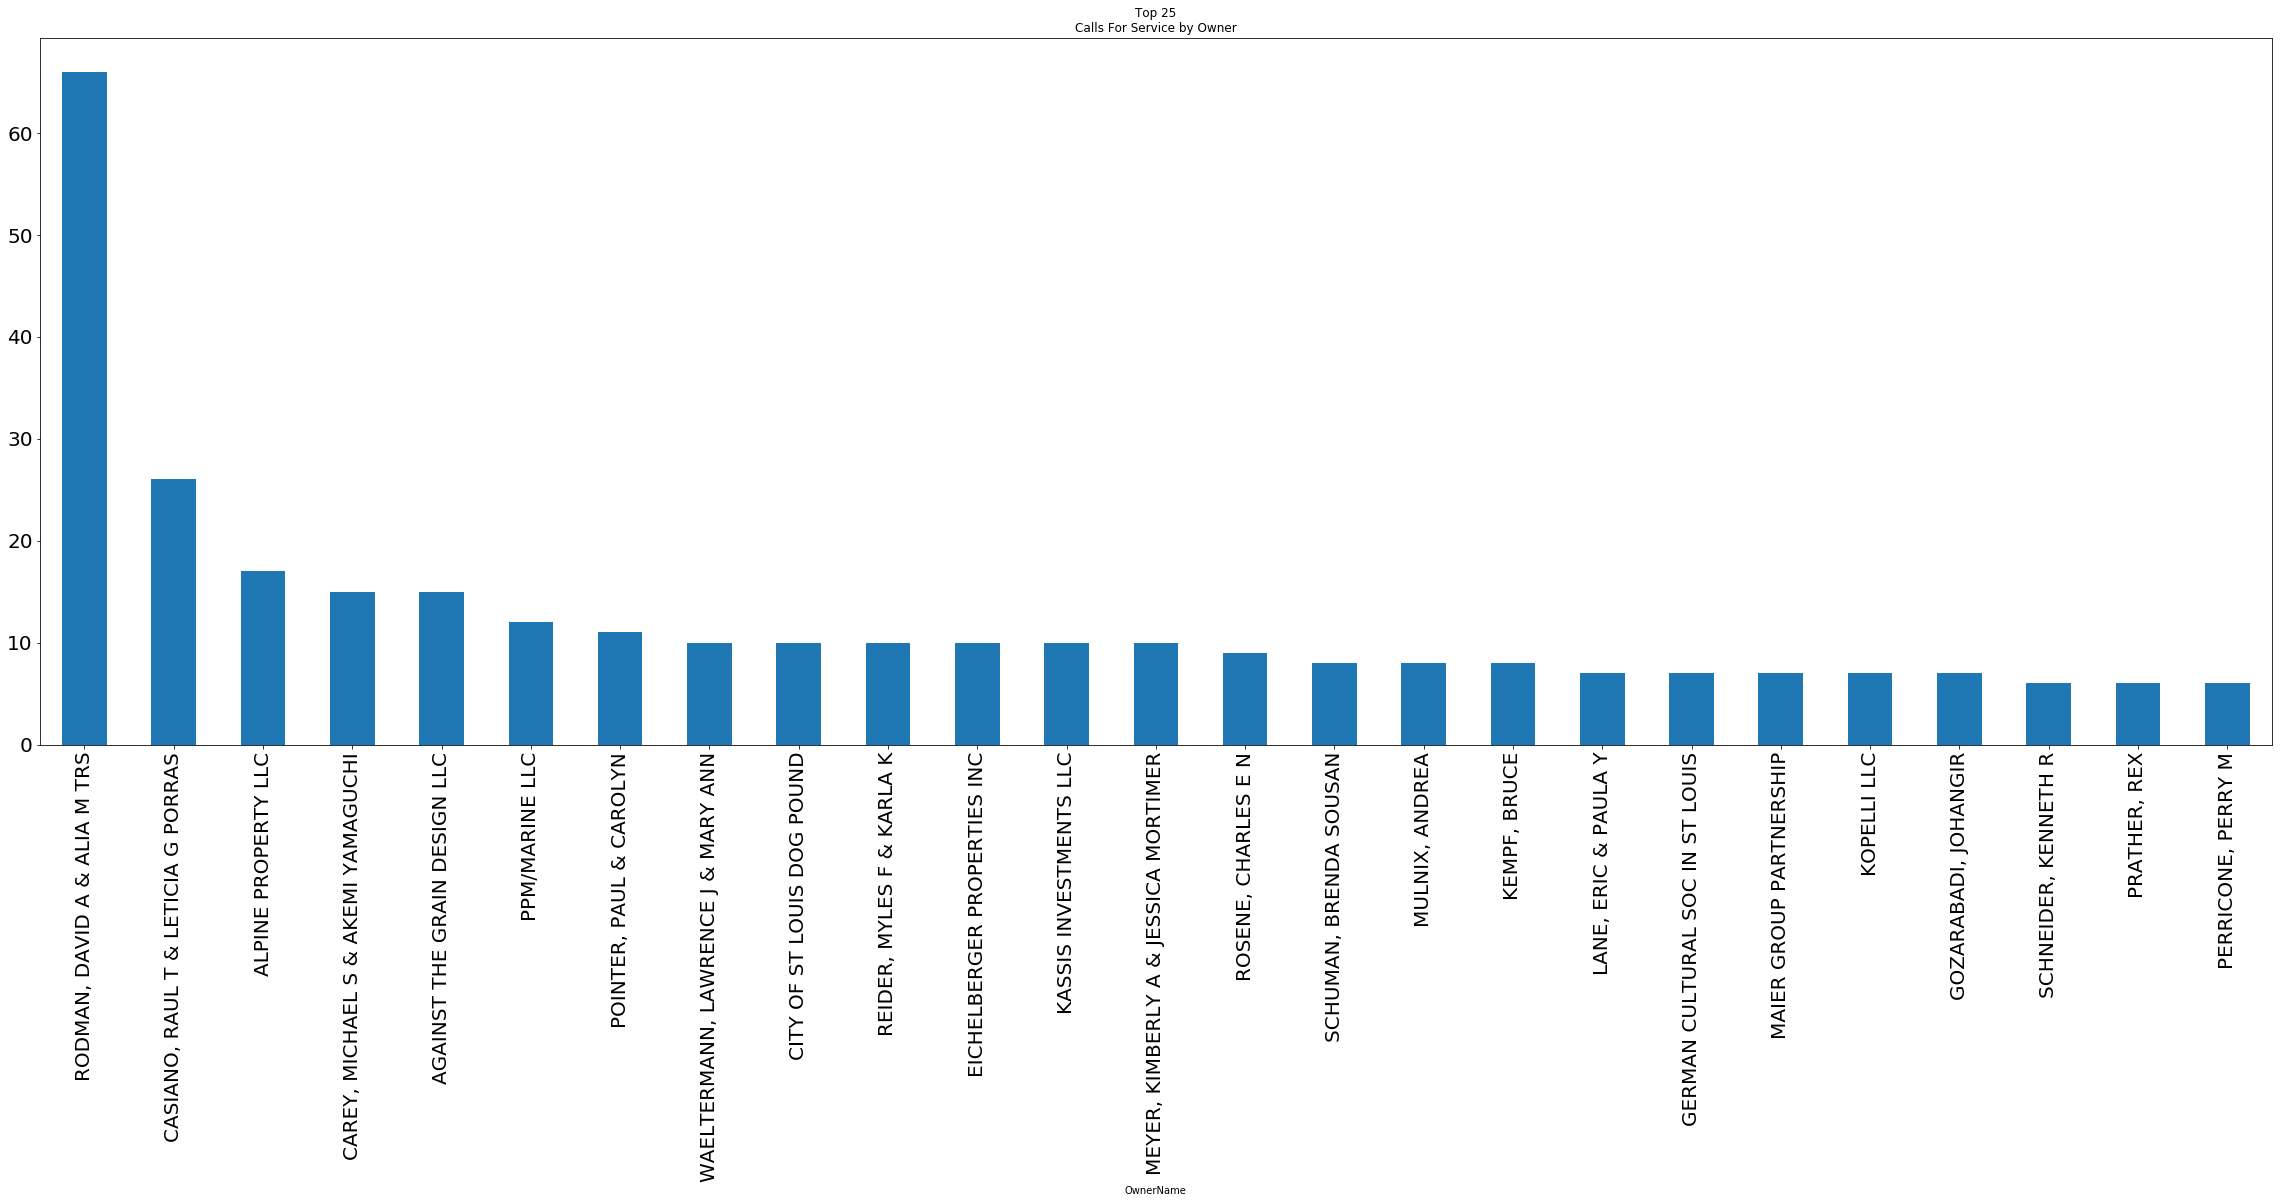

In [36]:
cfs_parcels[cfs_parcels['NHD_NAME']=='Marine Villa'].groupby('OwnerName')['dateStart'].count().sort_values(ascending=False)[:25].plot(kind='bar',figsize=(40,13),fontsize=20,title='Top 25\nCalls For Service by Owner')